# Web Scraping and Data Analysis

### 1. Web Scraping

In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"

In [5]:
data = requests.get(url).text

In [6]:
soup = BeautifulSoup(data, "html5lib")

In [7]:
table = soup.find_all("table")[1]

In [18]:
companies = []
for row in table.find_all("tr")[1:]:
    companies.append(row.find_all("td")[0].get_text())

In [19]:
review_date = []
for row in table.find_all("tr")[1:]:
    review_date.append(row.find_all("td")[3].get_text())

In [20]:
cocoa_percent = []
for row in table.find_all("tr")[1:]:
    cocoa_percent.append(row.find_all("td")[4].get_text())

In [21]:
company_location = []
for row in table.find_all("tr")[1:]:
    company_location.append(row.find_all("td")[5].get_text())

In [22]:
rating = []
for row in table.find_all("tr")[1:]:
    rating.append(row.find_all("td")[6].get_text())

In [23]:
data_dict = {"Companies":companies, 
             "ReviewDate": review_date, 
             "CocoaPercent": cocoa_percent, 
             "CompanyLocation":company_location,
             "Rating":rating}

In [24]:
df = pd.DataFrame(data_dict)

In [25]:
df.head()

,Companies,ReviewDate,CocoaPercent,CompanyLocation,Rating
0,A. Morin,2016,63%,France,3.75
1,A. Morin,2015,70%,France,2.75
2,A. Morin,2015,70%,France,3
3,A. Morin,2015,70%,France,3.5
4,A. Morin,2015,70%,France,3.5


### 2. Data Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Companies        1795 non-null   object
 1   ReviewDate       1795 non-null   object
 2   CocoaPercent     1795 non-null   object
 3   CompanyLocation  1795 non-null   object
 4   Rating           1795 non-null   object
dtypes: object(5)
memory usage: 70.2+ KB


In [28]:
df["ReviewDate"] = df["ReviewDate"].astype("int")

In [33]:
df["CocoaPercent"] = df["CocoaPercent"].astype("str").str.rstrip("%").astype("float")

In [34]:
df["Rating"] = df["Rating"].astype("float")

In [35]:
df.dtypes

Companies           object
ReviewDate           int32
CocoaPercent       float64
CompanyLocation     object
Rating             float64
dtype: object

In [36]:
df.head()

,Companies,ReviewDate,CocoaPercent,CompanyLocation,Rating
0,A. Morin,2016,63.0,France,3.75
1,A. Morin,2015,70.0,France,2.75
2,A. Morin,2015,70.0,France,3.00
3,A. Morin,2015,70.0,France,3.50
4,A. Morin,2015,70.0,France,3.50


#### En çok  oylanan 3 şirket ve Oy sayıları

In [329]:
ReviewCount = df[["Companies"]].value_counts()[:3].to_frame(name="Count").reset_index()

In [330]:
ReviewCount

,Companies,Count
0,Soma,47
1,Bonnat,27
2,Fresco,26


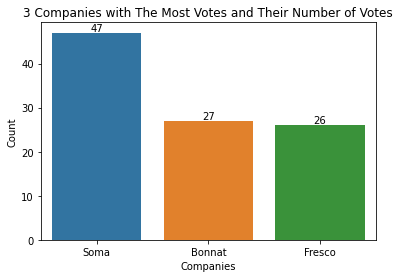

In [347]:
ax = sns.barplot(data=ReviewCount, x="Companies", y="Count")
for container in ax.containers:
    ax.bar_label(container)
plt.title("3 Companies with The Most Votes and Their Number of Votes");

##### En çok oylanan 3 şirketin review ortalamaları

In [306]:
df["Companies"].value_counts()[:3].index

Index(['Soma', 'Bonnat', 'Fresco'], dtype='object')

In [324]:
Top3ReviewCount = df[df["Companies"].isin(df["Companies"].value_counts()[:3].index)]

In [327]:
Ratings = Top3ReviewCount.groupby("Companies")[["Rating"]].mean().reset_index().sort_values(by="Rating", ascending=False)

In [328]:
Ratings

,Companies,Rating
2,Soma,3.585106
0,Bonnat,3.435185
1,Fresco,3.384615


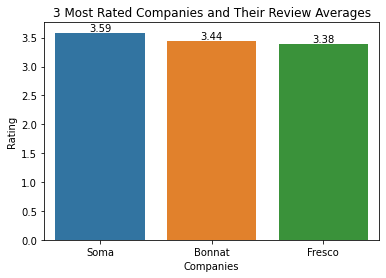

In [349]:
ax = sns.barplot(data=Ratings, x="Companies", y="Rating")
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.title("3 Most Rated Companies and Their Review Averages");

##### bu 3 şirketin yıllara sari review ortalama değşimi

In [325]:
df3 = Top3ReviewCount.groupby(["Companies", "ReviewDate"])["Rating"].mean().to_frame().reset_index()

In [326]:
df3.head()

,Companies,ReviewDate,Rating
0,Bonnat,2006,3.464286
1,Bonnat,2007,2.500000
2,Bonnat,2008,4.000000
3,Bonnat,2009,2.937500
4,Bonnat,2011,3.625000


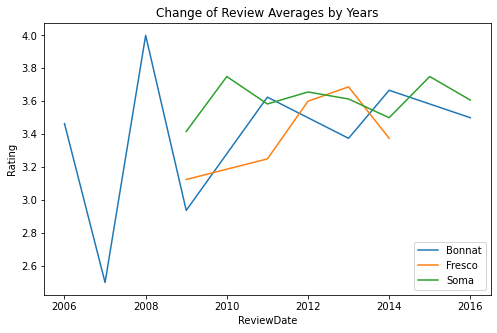

In [358]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df3, x="ReviewDate", y="Rating", hue="Companies")
plt.title("Change of Review Averages by Years")
plt.legend(loc=4);

##### Is more cacao better?

In [334]:
df["Rating"].corr(df["CocoaPercent"])
# There is no correlation.

-0.16482017762424417

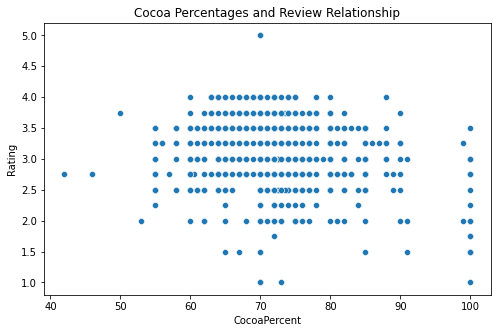

In [353]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, y="Rating", x="CocoaPercent")
plt.title("Cocoa Percentages and Review Relationship");